In [34]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [35]:
# load the dataset
data= pd.read_csv("CompleteDataMin.csv")
# check shape of dataset
# Các cột bạn muốn giữ lại
columns_to_keep = ["WIND_GUST", "VISIBILITY", "TEMPERATURE", "ACTIVE_WEATHER", "CANCELLED"]

# Xóa các cột trừ các cột được liệt kê
columns_to_drop = list(set(data.columns) - set(columns_to_keep))
data = data.drop(columns=columns_to_drop)
print("shape of the data:", data.shape)
data.head()

shape of the data: (1048575, 5)


,CANCELLED,WIND_GUST,VISIBILITY,TEMPERATURE,ACTIVE_WEATHER
0,0,0.0,8.0,9.39,0.0
1,0,0.0,10.0,12.22,0.0
2,2,NaN,NaN,NaN,NaN
3,0,0.0,5.0,2.22,1.0
4,0,0.0,10.0,20.00,0.0


In [36]:
# kiểm tra kiểu dữ liệu của cột
data.dtypes

CANCELLED           int64
WIND_GUST         float64
VISIBILITY        float64
TEMPERATURE       float64
ACTIVE_WEATHER    float64
dtype: object

In [37]:
# Xóa các hàng chứa giá trị thiếu
data = data.dropna()

In [38]:
data.isnull().sum()

CANCELLED         0
WIND_GUST         0
VISIBILITY        0
TEMPERATURE       0
ACTIVE_WEATHER    0
dtype: int64

In [39]:
# số lượng lớp mục tiêu
data["CANCELLED"].value_counts()

CANCELLED
0    1001528
2      27476
1      12919
3        752
Name: count, dtype: int64

In [40]:
# Xóa các dòng có CANCELLED khác 0 và 2 vì 2 là lí do chuyến bay bị hủy do thời tiết
data = data[data["CANCELLED"].isin([0, 2])]

# Kiểm tra lại số lượng lớp mục tiêu sau khi xóa
data["CANCELLED"].value_counts()

CANCELLED
0    1001528
2      27476
Name: count, dtype: int64

In [41]:
# Thực hiện undersample để cân bằng dữ liệu (vì dữ liệu bị mất cân bằng)
# Tỉ lệ phần trăm mẫu lớp 0 cần giữ lại 
undersample_percentage = 0.2        

# Tính số lượng mẫu lớp thiểu số và lớp đa số
count_class_0 = 1001528
count_class_1 = 27476

# Tính số lượng mẫu cần giữ lại từ lớp đa số
undersample_count = int(count_class_1 / undersample_percentage)

# Giảm số lượng mẫu lớp đa số theo tỷ lệ phần trăm
undersampled_data = pd.concat([data[data['CANCELLED'] == 0].sample(undersample_count), data[data['CANCELLED'] == 2]])

# Kiểm tra số lượng mẫu trong tập dữ liệu mới
undersampled_data['CANCELLED'].value_counts()


CANCELLED
0    137380
2     27476
Name: count, dtype: int64

In [42]:
data=undersampled_data

In [43]:
# Tỷ lệ phần trăm của lớp có trong biến mục tiêu (y)
print("Phần trăm của 0 và 2\n",data["CANCELLED"].value_counts()/len(data)*100)

Phần trăm của 0 và 2
 CANCELLED
0    83.333333
2    16.666667
Name: count, dtype: float64


In [44]:
# Chuyển kiểu dữ liệu thành kiểu int
data["WIND_GUST"] = data["WIND_GUST"].astype('int64')
data["VISIBILITY"] = data["VISIBILITY"].astype('int64')
data["TEMPERATURE"] = data["TEMPERATURE"].astype('int64')
data["ACTIVE_WEATHER"] = data["ACTIVE_WEATHER"].astype('int64')

In [45]:
data.dtypes

CANCELLED         int64
WIND_GUST         int64
VISIBILITY        int64
TEMPERATURE       int64
ACTIVE_WEATHER    int64
dtype: object

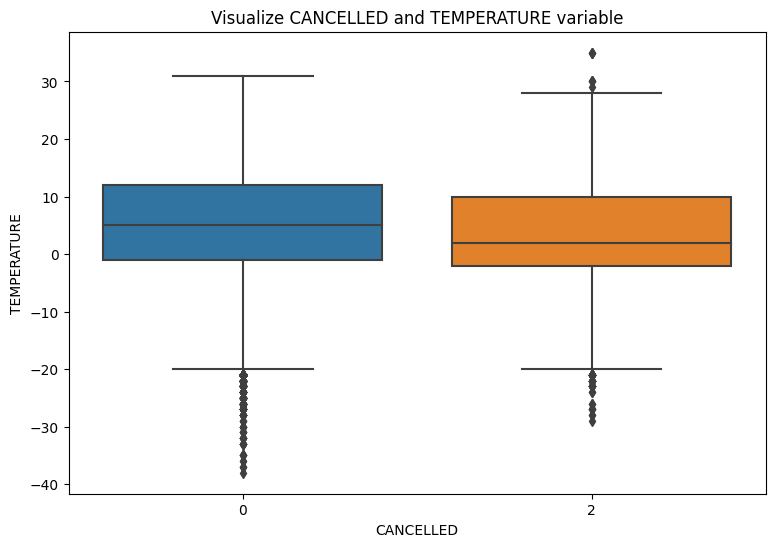

In [70]:
#Khám phá mối quan hệ giữa các biến CANCELLED và TEMPERATURE
f, ax = plt.subplots(figsize=(9, 6))
ax = sns.boxplot(x="CANCELLED", y="TEMPERATURE", data=data)
ax.set_title("Visualize CANCELLED and TEMPERATURE variable")
plt.show()

In [47]:
data.head()

,CANCELLED,WIND_GUST,VISIBILITY,TEMPERATURE,ACTIVE_WEATHER
883772,0,0,10,0,0
173029,0,0,10,13,0
138564,0,0,10,-2,0
660162,0,0,10,2,0
260281,0,0,10,-7,0


In [48]:
# indentifying the numerical variables
num_var= data.select_dtypes(include=np.number)
num_var.head()

,CANCELLED,WIND_GUST,VISIBILITY,TEMPERATURE,ACTIVE_WEATHER
883772,0,0,10,0,0
173029,0,0,10,13,0
138564,0,0,10,-2,0
660162,0,0,10,2,0
260281,0,0,10,-7,0


In [49]:
data.describe()

,CANCELLED,WIND_GUST,VISIBILITY,TEMPERATURE,ACTIVE_WEATHER
count,164856.000000,164856.000000,164856.000000,164856.000000,164856.000000
mean,0.333333,3.697742,9.044973,4.897492,0.168650
std,0.745358,8.765223,2.402167,9.689849,0.390727
min,0.000000,0.000000,0.000000,-38.000000,0.000000
25%,0.000000,0.000000,10.000000,-1.000000,0.000000
50%,0.000000,0.000000,10.000000,4.000000,0.000000
75%,0.000000,0.000000,10.000000,12.000000,0.000000
max,2.000000,50.000000,20.000000,35.000000,2.000000


In [50]:
# label encoded dataset
data.head()

,CANCELLED,WIND_GUST,VISIBILITY,TEMPERATURE,ACTIVE_WEATHER
883772,0,0,10,0,0
173029,0,0,10,13,0
138564,0,0,10,-2,0
660162,0,0,10,2,0
260281,0,0,10,-7,0


In [51]:
data.dtypes

CANCELLED         int64
WIND_GUST         int64
VISIBILITY        int64
TEMPERATURE       int64
ACTIVE_WEATHER    int64
dtype: object

<Axes: >

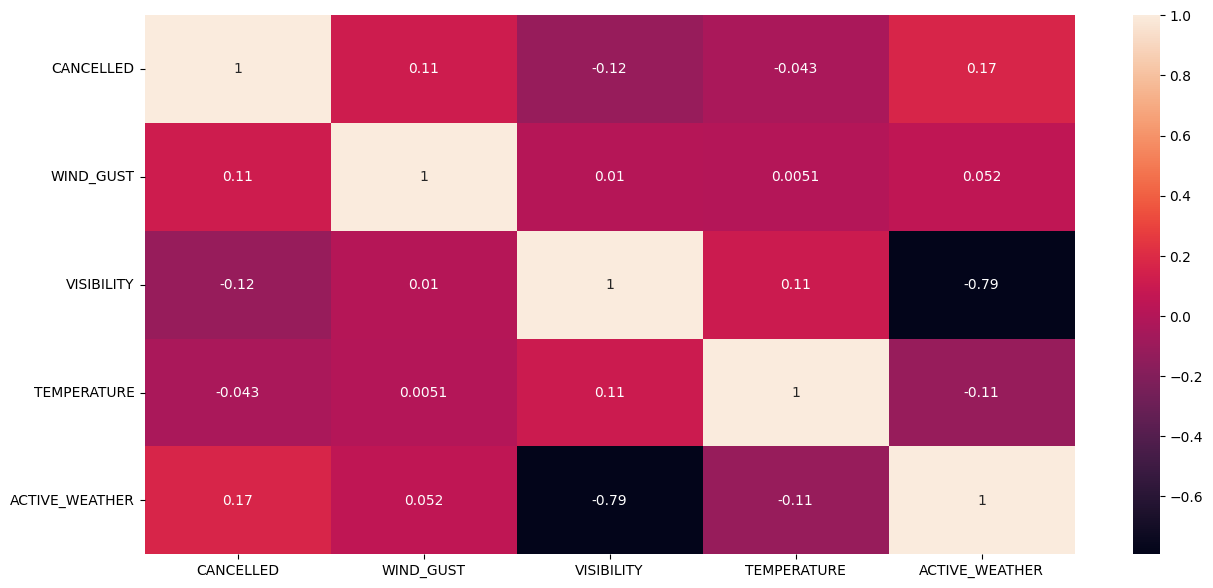

In [52]:
#biểu đồ heatmap của ma trận tương quan
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(), annot=True)
# Ta thấy các ô màu đậm, điều này cho thấy có một mức độ tương quan cao giữa các cặp biến số tương ứng.

In [53]:
# Biến mục tiêu
labels = data.iloc[:, 0]

# Biến đặc trưng 
features = data.iloc[:, 1:]

In [54]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [55]:
#Xây dựng mô hình trên tập dữ liệu train
from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(X_train, y_train)

# Predict Output
predicted = model.predict(X_test)

print("Actual Value:")
print("Predicted Value:", predicted)



Actual Value:
Predicted Value: [0 0 0 ... 0 0 0]


In [56]:
#Tính đoán độ chính xác của mô hình
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)


y_pred = model.predict(X_test)
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")
print("Accuracy:", accuray)
print("F1 Score:", f1)



Accuracy: 0.7794189008856
F1 Score: 0.7890962939947429


In [57]:
# Đánh giá độ chính xác của mô hình
accuracy = accuracy_score(y_test, y_pred)
print("Độ chính xác của mô hình: {:.2f}%".format(accuracy * 100))

Độ chính xác của mô hình: 77.94%


In [58]:
# Ma trận nhầm lẫn

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[24274  3094]
 [ 4179  1425]]


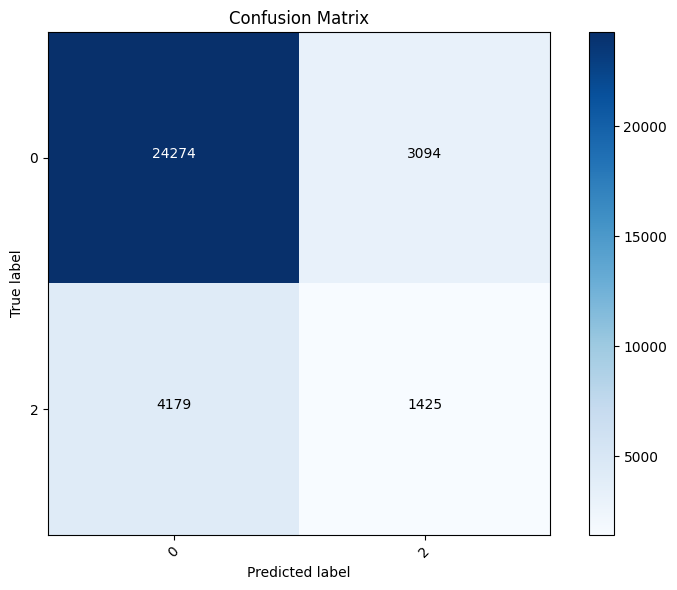

In [59]:
# Tính toán ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)

# Tạo danh sách tên các lớp
class_names = np.unique(y_test)

# Vẽ biểu đồ
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Định dạng và hiển thị các giá trị trên ma trận nhầm lẫn
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.tight_layout()
plt.show()

75332: mẫu mang nhãn 0 được phân lớp đúng vào lớp 0

1068: mẫu mang nhãn 0 được phân lớp sai vào lớp 2 

11926: mẫu mang nhãn 2 được phân lớp sai vào lớp 0

3345: mẫu mãng nhãn 2 được phân lớp đúng vào lớp 2

In [60]:
data
data_array = np.array(data)

# In mảng NumPy
print(data_array)

[[ 0  0 10  0  0]
 [ 0  0 10 13  0]
 [ 0  0 10 -2  0]
 ...
 [ 2  0  2  2  1]
 [ 2  0  7  6  0]
 [ 2  0 10 -1  0]]


In [61]:
from sklearn.naive_bayes import GaussianNB
import numpy as np

# Dữ liệu đặc trưng (features)
X = data_array[:, 1:]  # Lấy các cột từ cột thứ 2 trở đi

# Dữ liệu nhãn (labels)
y = data_array[:, 0]  # Lấy cột đầu tiên

# Tạo mô hình Gaussian Naive Bayes
model.fit(X, y)

# Rút tập luật từ mô hình Naive Bayes
def extract_rules_from_model(model, feature_names, class_names):
    rules = []

    for i, class_name in enumerate(class_names):
        class_data = X[y == class_name]
        class_mean = np.mean(class_data, axis=0)
        class_std = np.std(class_data, axis=0)

        for j, feature_name in enumerate(feature_names):
            rule = f"If {feature_name} <= {class_mean[j]:.2f} + 2*{class_std[j]:.2f}"
            rules.append(rule)

    return rules

# Truy xuất các tập luật từ mô hình Naive Bayes
feature_names = ['WIND_GUST', 'VISIBILITY', 'TEMPERATURE', 'ACTIVE_WEATHER']
class_names = np.unique(y)
rules = extract_rules_from_model(model, feature_names, class_names)

# In các tập luật
for i, rule in enumerate(rules):
    print(f"Rule {i+1}: {rule}")


Rule 1: If WIND_GUST <= 3.26 + 2*8.33
Rule 2: If VISIBILITY <= 9.17 + 2*2.23
Rule 3: If TEMPERATURE <= 5.09 + 2*9.78
Rule 4: If ACTIVE_WEATHER <= 0.14 + 2*0.36
Rule 5: If WIND_GUST <= 5.87 + 2*10.39
Rule 6: If VISIBILITY <= 8.40 + 2*3.05
Rule 7: If TEMPERATURE <= 3.96 + 2*9.15
Rule 8: If ACTIVE_WEATHER <= 0.32 + 2*0.50


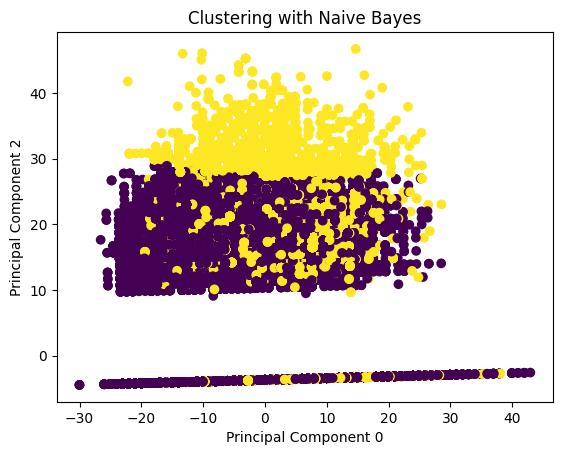

In [71]:
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Dữ liệu đặc trưng (features)
X = data_array[:, 1:]  # Lấy các cột từ cột thứ 2 trở đi

# Dữ liệu nhãn (labels)
y = data_array[:, 0]  # Lấy cột đầu tiên

# Tạo mô hình Gaussian Naive Bayes
model.fit(X, y)

# Sử dụng phân tích thành phần chính (PCA) để giảm chiều dữ liệu xuống 2 chiều
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Dự đoán nhãn của các điểm dữ liệu
predicted_labels = model.predict(X)

# Vẽ đồ thị các mô hình phân cụm
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=predicted_labels, cmap='viridis')
plt.xlabel('Principal Component 0')
plt.ylabel('Principal Component 2')
plt.title('Clustering with Naive Bayes')
plt.show()
